# Spotify Trends Analysis: Cultural Differences in Music Taste

The aim of this project is to show my skills in basic data exploration and visualization of the data. To accomplish this, I'm going to use database with 50 the most popular songs in every country in the time frame 18.10.2023-12.07.2024. The theme and goal of the project is to discover and identify characteristics of specific countries and regions music tastes that stand out from the global trends. All of the work will be done using python and tableau.

Link to database from [**Kaggle**](https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated)


In [137]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

In [138]:
df = pd.read_csv("universal_top_spotify_songs.csv")

### Structure

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967753 entries, 0 to 967752
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          967753 non-null  object 
 1   name                967726 non-null  object 
 2   artists             967726 non-null  object 
 3   daily_rank          967753 non-null  int64  
 4   daily_movement      967753 non-null  int64  
 5   weekly_movement     967753 non-null  int64  
 6   country             954646 non-null  object 
 7   snapshot_date       967753 non-null  object 
 8   popularity          967753 non-null  int64  
 9   is_explicit         967753 non-null  bool   
 10  duration_ms         967753 non-null  int64  
 11  album_name          967273 non-null  object 
 12  album_release_date  967395 non-null  object 
 13  danceability        967753 non-null  float64
 14  energy              967753 non-null  float64
 15  key                 967753 non-nul

In [140]:
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2qSkIjg1o9h3YT9RAgYN75,Espresso,Sabrina Carpenter,1,0,0,NaN,2024-07-12,99,True,...,0,-5.478,1,0.0285,0.1070,0.000065,0.1850,0.690,103.969,4
1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,2,0,1,NaN,2024-07-12,98,False,...,2,-10.171,1,0.0358,0.2000,0.060800,0.1170,0.438,104.978,4
2,5N3hjp1WNayUPZrA8kJmJP,Please Please Please,Sabrina Carpenter,3,0,-1,NaN,2024-07-12,98,True,...,9,-6.073,1,0.0540,0.2740,0.000000,0.1040,0.579,107.071,4
3,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,Kendrick Lamar,4,0,1,NaN,2024-07-12,96,True,...,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061,4
4,6XjDF6nds4DE2BBbagZol6,Gata Only,"FloyyMenor, Cris Mj",5,0,-1,NaN,2024-07-12,96,True,...,8,-8.472,0,0.0509,0.4460,0.000024,0.0899,0.669,99.986,4


### Cleaning

We will change unit of the duration_ms from ms to min. It will be less precise, but will give us a cleaner view about duration of the songs.

Also we will change every missing value in country column to WORLD.

In [141]:
df['duration_min'] = df['duration_ms']/60000
df['country'].fillna('WORLD', inplace=True)

In [142]:
df = df.drop_duplicates()

### Creating datasets needed

In [143]:
columns = ['duration_min','is_explicit','popularity','danceability',"energy",'speechiness','acousticness','instrumentalness','liveness','valence','tempo','loudness']
countries_df = df.groupby('country')[columns].mean().reset_index()
countries_df_by_date = df.groupby(['country','snapshot_date'])[columns].mean().reset_index()

In [144]:
countries_df_by_date.round(2).to_csv("Spotify_countries_df_by_date.csv")

### Investigating databese to find out where cultural differences can be seen

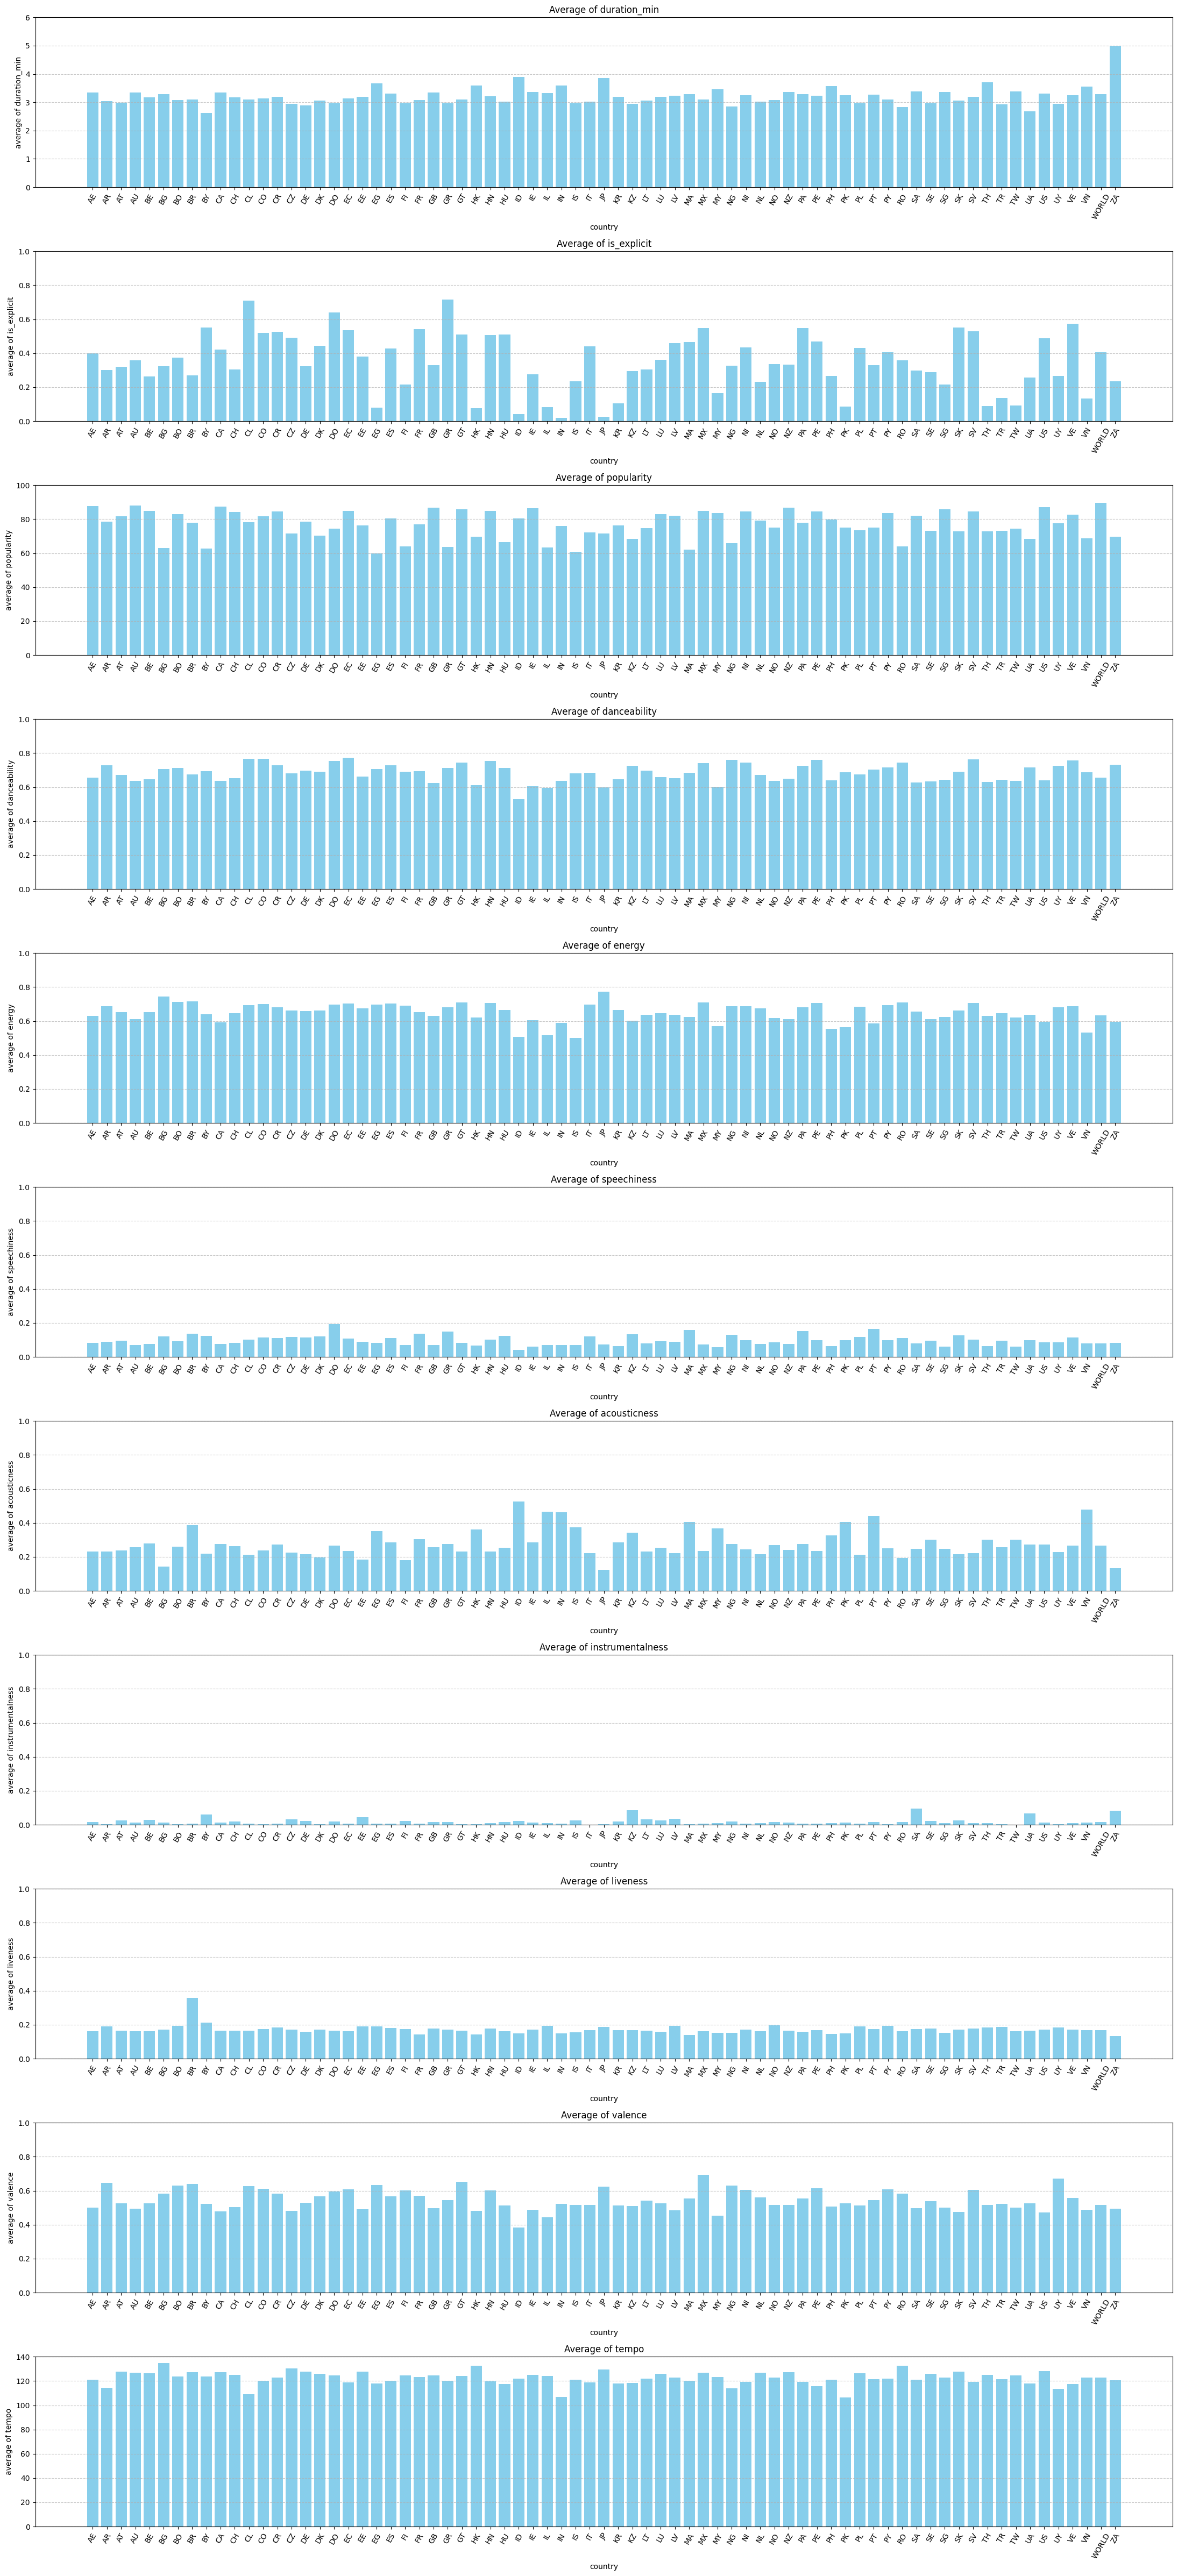

In [145]:
plt.figure(figsize=(22, 48))
for i in range(len(columns)-1):
    plt.subplot(len(columns)-1, 1, i+1)
    plt.bar(countries_df["country"], countries_df[columns[i]], color='skyblue')
    plt.xlabel('country')
    plt.ylabel(f'average of {columns[i]}')
    plt.title(f'Average of {columns[i]}')
    plt.xticks(rotation=60)
    match columns[i]:
        case "duration_min": plt.ylim(0,6)
        case 'tempo': plt.ylim(0,140)
        case'popularity': plt.ylim(0,100)
        case _: plt.ylim(0,1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

After the initial anialize I decided to develop project in 2 different directions:
> 1. Get more information about lenght of music in the RSA
> 1. Using Tableau to visualize diffrences on world map to get more insight into regions characteristics in categories:
>> 1. is_explicit
>> 1. acousticness
>> 1. dancebility
>> 1. popularity

## 1. Getting more insight throu analizing data about duration of songs in the RSA and abroad

Using general data we will mark 90% confidence interval for the duration of song as red dashed lines.

90% Confidence interval for general data: 1.83 - 4.61
Mean of duration_min in the RSA: 4.97
Mean of duration_min in general: 3.22


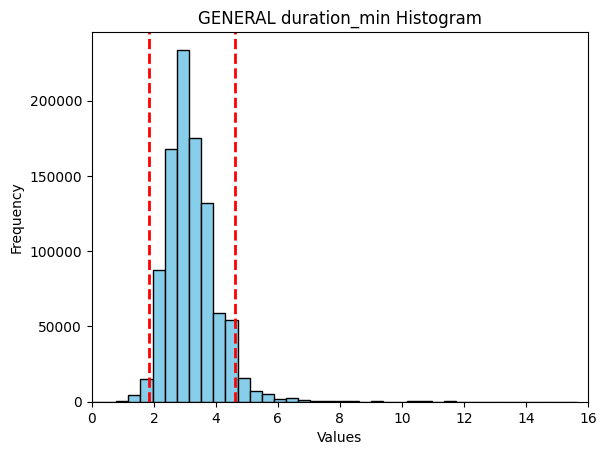

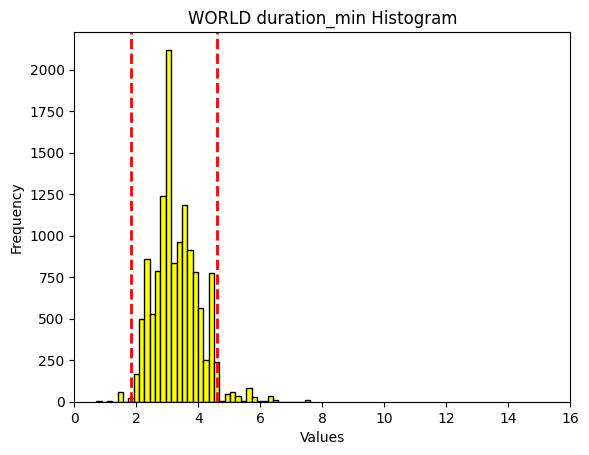

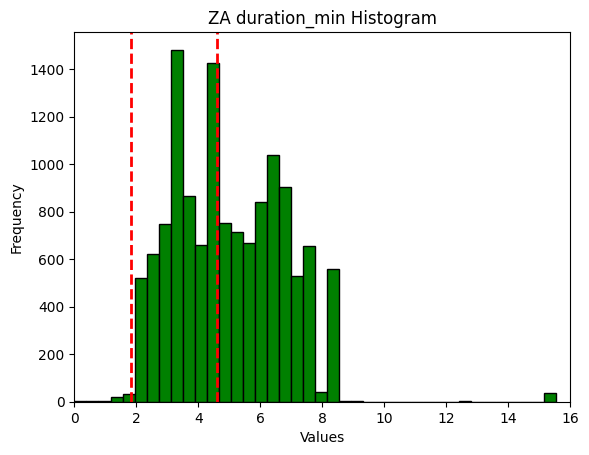

In [146]:
column = 'duration_min'
investigated_country = 'ZA'
std = df[column].std()
h1 ,h2 = st.t.interval(df=len(df[column])-1, 
              loc=np.mean(df[column]), 
              confidence=0.90,scale = std)


def show_plot(country : str,color, lim = 1,has_confidence_interval = True):
    if country == "GENERAL": plt.hist(df[column], bins=40, color=color, edgecolor='black')
    else: plt.hist(df[df['country'] == country][column], bins=40, color=color, edgecolor='black')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'{country} {column} Histogram')
    if has_confidence_interval:
        plt.axvline(x=h1, color='red', linestyle='--', linewidth=2)
        plt.axvline(x=h2, color='red', linestyle='--', linewidth=2)
    plt.xlim(0,lim)
    plt.show()

print("90% Confidence interval for general data:",round(h1,2),"-" ,round(h2,2))
print(f"Mean of {column} in the RSA:", round(np.mean(df[df['country'] == investigated_country][column]),2))
print(f"Mean of {column} in general:", round(np.mean(df[column]),2))

show_plot("GENERAL", "skyblue",lim = 16)
show_plot("WORLD", "yellow",lim = 16)
show_plot(investigated_country, "green",lim = 16)

We can easly see that the percentage of longer songs in the RSA is significantly larger than in general and world statistic.
Now, we will take a look at correlation with popularity and look for possible insights from that.

Red dashed lines are used to mark means in charts below.

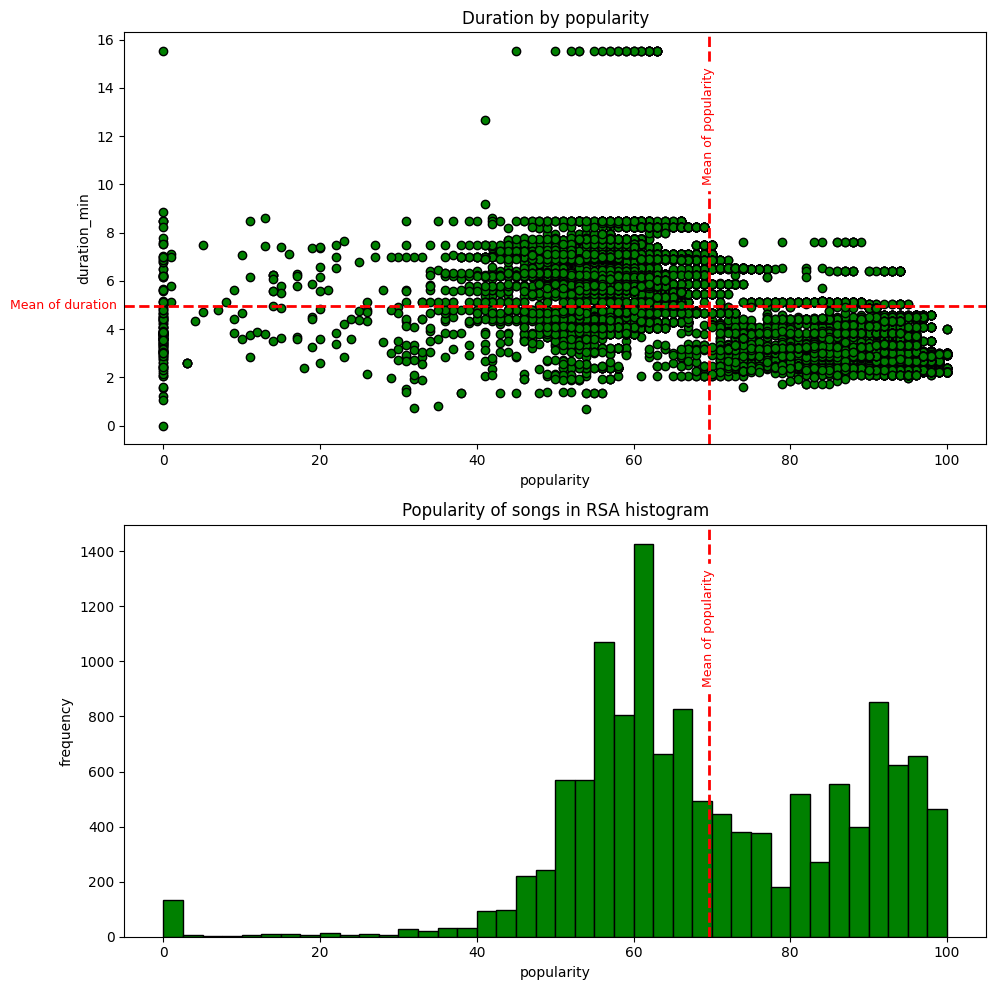

In [147]:
duration_mean = df[df['country'] == investigated_country][column].mean()
populaity_mean = df[df['country'] == investigated_country]["popularity"].mean()


plt.figure(figsize = (10,10))




plt.subplot(2,1,1)
plt.scatter(df[df['country'] == investigated_country]["popularity"],df[df['country'] == investigated_country][column], color="green", edgecolor='black')
plt.ylabel(column)
plt.axhline(y=duration_mean, color='red', linestyle='--', linewidth=2)
plt.xlabel('popularity')
plt.title("Duration by popularity")
plt.axvline(x=populaity_mean, color='red', linestyle='--', linewidth=2)

plt.text(populaity_mean, 0.8* max(df[df['country'] == "ZA"]["duration_min"]), "Mean of popularity", size=9, rotation=90, color = "red",
     ha="center", va="center",bbox = dict(ec='1',fc='1'))
plt.text(-12.75, duration_mean, "Mean of duration", size=9, rotation = 0, color = "red",
     ha="center", va="center",bbox = dict(ec='1',fc='1'))


plt.subplot(2,1,2)
plt.hist(df[df['country'] == investigated_country]["popularity"],bins=40, color="green", edgecolor='black')
plt.xlabel('popularity')
plt.ylabel('frequency')
plt.title('Popularity of songs in RSA histogram')
plt.axvline(x=populaity_mean, color='red', linestyle='--', linewidth=2)
plt.text(populaity_mean, 0.8* 1400, "Mean of popularity", size=9, rotation=90, color = "red",
     ha="center", va="center",bbox = dict(ec='1',fc='1'))





plt.tight_layout()
plt.show()

Popularity is global score, so based on the correlation of the duration with popularity, we can conclude that the group of shorter songs is also popular in different countries and the group of longer songs is popular in this specific region. 

To prove that, we will check if music popular in the RSA tends to be lisened abroad the country.

In [148]:
ZA_index = df[df["country"] == investigated_country].index.values
df_without_ZA = df.drop(ZA_index)

In [149]:
longer_songs_in_RSA = df[df['country'] == investigated_country][df['duration_min'] > duration_mean]
shorter_songs_in_RSA = df[df['country'] == investigated_country][df['duration_min'] <= duration_mean]

/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_16149/121356111.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  longer_songs_in_RSA = df[df['country'] == investigated_country][df['duration_min'] > duration_mean]
/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_16149/121356111.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  shorter_songs_in_RSA = df[df['country'] == investigated_country][df['duration_min'] <= duration_mean]


In [150]:
Longer_songs,Shorter_songs = [0, 0]

for id in longer_songs_in_RSA['spotify_id']:
    if id in df_without_ZA['spotify_id'].values: Longer_songs +=1
for id in shorter_songs_in_RSA['spotify_id']:
    if id in df_without_ZA['spotify_id'].values: Shorter_songs +=1
    
long_perc = round((Longer_songs/len(longer_songs_in_RSA['spotify_id'])),2)
short_perc = round((Shorter_songs/len(shorter_songs_in_RSA['spotify_id'])),2)

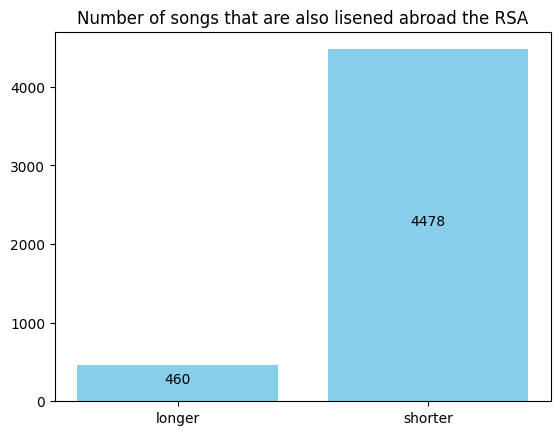

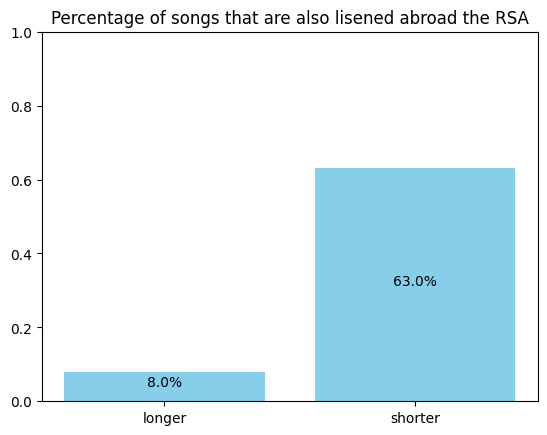

In [151]:
plt.bar(["longer","shorter"],[Longer_songs,Shorter_songs],color='skyblue')
plt.title("Number of songs that are also lisened abroad the RSA")
plt.text("longer", Longer_songs/2, Longer_songs, ha = "center")
plt.text("shorter", Shorter_songs/2, Shorter_songs, ha = "center")
plt.show()

plt.bar(["longer","shorter"],[long_perc,short_perc],color='skyblue')
plt.title("Percentage of songs that are also lisened abroad the RSA")
plt.text("longer", long_perc/2, f"{long_perc*100}%", ha = "center")
plt.text("shorter", short_perc/2, f"{short_perc*100}%", ha = "center")
plt.ylim(0,1)
plt.show()

Based on this test, we can conclude, that longer songs are popular mainly in the RSA. We can't check the country of origin of those songs, so we can only hypotize, that longer songs are mainly produced in the RSA or some of longer songs from foreign countries tend to be lisened mainly in the RSA. To investigate it futher it would be necessary to collect more data about country of origin of the song.

## 2. Getting insight from Tableau vizualizations

Link to the interactive map on [**Tableau**](https://public.tableau.com/app/profile/wiktor.ku.nierkiewicz/viz/Spotify_Top_Songs_Map_Explicity/Explicity?publish=yes)

> #### 2.1. Explicity

![Explicity](Explicity.png)

We can easly notice that percentage of explicit songs is much lower in countries of south Asia in comparison to the North America or Europe.

> #### 2.2. Acousticness

![Acousticness](Acousticness.png)

The main thing that stands out is high acousticness of music in south Asia (Excluding Thailand), but that isn't the most interesting thing about this chart.

![Acousticness2](Acousticness-2.png)

In November and December of 2023 we can see a significant change in statistic of acousticness in North America and Europe. Unfortunetly, to confirm if this informtion is correlated with date we would need to gather more data to investigate.

> #### 2.3. Dancebility

![Dancebility](Dancebility.png)

We can again see on the chart that south Asia appears to be different from the rest of the world. However, becouse the range of the means for every country is very narrow, we shouldn't make any hard assumptions using only this graph. But we can use it and previous charts to find out patterns of how countries create music taste groups. For example it is often for south Asia to have simillar score different from the rest of the world. Or there is probably correlation in scores of popular songs in Portugal and Brasil. Or we can see that Canada and USA in every example have similar scores, when Europe tends to be divided. Depending of what part of world interest us we might start using those graphs for identifing similar tastes of music in countries around the globe.

> #### 2.4. Popularity

![Popularity](Popularity.png)

The main insight that we get from this chart is that the biggest english speaking countries have the highest score of popularity of their most popular songs. That shouldn't be suprising considering that those countries have big populations speaking the most popular language on the world and easly can reach audiences from every country.